In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv("titanic.csv")

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.shape

(891, 12)

In [7]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])

In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [11]:
data.drop('Name',axis=1,inplace=True)

In [12]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S


In [13]:
data.drop('Ticket',axis=1,inplace=True)

In [14]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,NaN,S
1,2,1,1,0,38.0,1,0,71.2833,C85,C
2,3,1,3,0,26.0,0,0,7.9250,NaN,S
3,4,1,1,0,35.0,1,0,53.1000,C123,S
4,5,0,3,1,35.0,0,0,8.0500,NaN,S


In [15]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
data['Embarked'].fillna(data['Embarked'].mode().values[0],inplace=True)

In [18]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [19]:
data['Cabin'].fillna(0,inplace=True)

In [20]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Embarked']=le.fit_transform(data['Embarked'])

In [22]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0,2
1,2,1,1,0,38.0,1,0,71.2833,C85,0
2,3,1,3,0,26.0,0,0,7.9250,0,2
3,4,1,1,0,35.0,1,0,53.1000,C123,2
4,5,0,3,1,35.0,0,0,8.0500,0,2


In [23]:
data.drop('Cabin',axis=1,inplace=True)

In [24]:
data_x=data.drop('Survived',axis=1)

In [25]:
data_x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,2
1,2,1,0,38.0,1,0,71.2833,0
2,3,3,0,26.0,0,0,7.9250,2
3,4,1,0,35.0,1,0,53.1000,2
4,5,3,1,35.0,0,0,8.0500,2


In [26]:
data_y=data['Survived']

In [27]:
data_y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

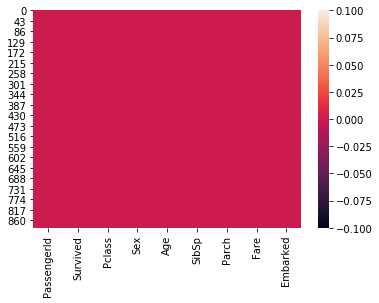

In [28]:
import seaborn as sns
sns.heatmap(data.isnull())

In [29]:
x=data_x

In [30]:
y=data_y

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
max_acc_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    y_pred=lg.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print("accuracy_score:",r_state,"is",acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
        
print(final_r_state)
print(max_acc_score)

accuracy_score: 42 is 0.8044692737430168
accuracy_score: 43 is 0.7597765363128491
accuracy_score: 44 is 0.7541899441340782
accuracy_score: 45 is 0.8435754189944135
accuracy_score: 46 is 0.8212290502793296
accuracy_score: 47 is 0.8100558659217877
accuracy_score: 48 is 0.7932960893854749
accuracy_score: 49 is 0.8156424581005587
accuracy_score: 50 is 0.7877094972067039
accuracy_score: 51 is 0.776536312849162
accuracy_score: 52 is 0.7821229050279329
accuracy_score: 53 is 0.776536312849162
accuracy_score: 54 is 0.7821229050279329
accuracy_score: 55 is 0.7877094972067039
accuracy_score: 56 is 0.8324022346368715
accuracy_score: 57 is 0.776536312849162
accuracy_score: 58 is 0.7541899441340782
accuracy_score: 59 is 0.7430167597765364
accuracy_score: 60 is 0.7541899441340782
accuracy_score: 61 is 0.7597765363128491
accuracy_score: 62 is 0.7877094972067039
accuracy_score: 63 is 0.8156424581005587
accuracy_score: 64 is 0.7877094972067039
accuracy_score: 65 is 0.8156424581005587
accuracy_score: 66 

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=45)

In [33]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(pred)

[0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1
 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0]


In [34]:
print("accuracy_score:",accuracy_score(y_test,pred))
print("confusion_matrix:",confusion_matrix(y_test,pred))
print("classification_report:",classification_report(y_test,pred))

accuracy_score: 0.8435754189944135
confusion_matrix: [[103  14]
 [ 14  48]]
classification_report:               precision    recall  f1-score   support

           0       0.88      0.88      0.88       117
           1       0.77      0.77      0.77        62

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [35]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(predgnb,y_test))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.8156424581005587
[[98 19]
 [14 48]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       117
           1       0.72      0.77      0.74        62

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.82      0.82      0.82       179



In [36]:
from sklearn.svm import SVC
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(predsvc,y_test))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [37]:
svmkernel('linear')

0.8435754189944135
[[103  14]
 [ 14  48]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       117
           1       0.77      0.77      0.77        62

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [38]:
svmkernel('poly')

0.6815642458100558
[[114   3]
 [ 54   8]]
              precision    recall  f1-score   support

           0       0.68      0.97      0.80       117
           1       0.73      0.13      0.22        62

    accuracy                           0.68       179
   macro avg       0.70      0.55      0.51       179
weighted avg       0.70      0.68      0.60       179



In [39]:
svmkernel('rbf')

0.6871508379888268
[[115   2]
 [ 54   8]]
              precision    recall  f1-score   support

           0       0.68      0.98      0.80       117
           1       0.80      0.13      0.22        62

    accuracy                           0.69       179
   macro avg       0.74      0.56      0.51       179
weighted avg       0.72      0.69      0.60       179



In [40]:
from sklearn.tree import DecisionTreeClassifier
dct=DecisionTreeClassifier()
dct.fit(x_train,y_train)
preddtc=dct.predict(x_test)
print(accuracy_score(preddtc,y_test))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8212290502793296
[[99 18]
 [14 48]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       117
           1       0.73      0.77      0.75        62

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [41]:
from sklearn.neighbors import KNeighborsClassifier
dtn=KNeighborsClassifier()
dtn.fit(x_train,y_train)
preddtn=dtn.predict(x_test)
print(accuracy_score(preddtn,y_test))
print(confusion_matrix(y_test,preddtn))
print(classification_report(y_test,preddtn))

0.6368715083798883
[[90 27]
 [38 24]]
              precision    recall  f1-score   support

           0       0.70      0.77      0.73       117
           1       0.47      0.39      0.42        62

    accuracy                           0.64       179
   macro avg       0.59      0.58      0.58       179
weighted avg       0.62      0.64      0.63       179



In [42]:
from sklearn.model_selection import cross_val_score
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),GaussianNB(),LogisticRegression()]
for m in model:
    score=cross_val_score(m,x,y,cv=8)
    print(score)
    print(score.mean())
    print(score.std())

[0.74107143 0.72321429 0.64285714 0.71171171 0.6036036  0.56756757
 0.79279279 0.67567568]
0.6823117760617761
0.06996252482345697
[0.61607143 0.625      0.66964286 0.66666667 0.64864865 0.63063063
 0.7027027  0.63963964]
0.6498753217503218
0.02669633349258016
[0.61607143 0.65178571 0.40178571 0.3963964  0.47747748 0.44144144
 0.54954955 0.66666667]
0.5251467985842986
0.10368319825140256
[0.76785714 0.76785714 0.79464286 0.8018018  0.78378378 0.79279279
 0.76576577 0.82882883]
0.7879162644787644
0.02014985222062659
[0.75       0.79464286 0.82142857 0.76576577 0.75675676 0.74774775
 0.81081081 0.78378378]
0.7788670366795367
0.026379830333558753


In [43]:
from sklearn.model_selection import cross_val_predict
def svmkernel(ker):
    svc=SVC(kernel=ker)
    score=cross_val_score(svc,x,y,cv=8)
    print(score.mean())
    print(score.std())
    y_pred=cross_val_predict(svc,x,y,cv=5)
    conf_mat=confusion_matrix(y,y_pred)
    print(conf_mat)
    print(y_pred)

In [44]:
svmkernel('linear')

0.78557351994852
0.023191625804125097
[[470  79]
 [112 230]]
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0
 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1
 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0
 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 

In [45]:
svmkernel('poly')

0.6454210907335907
0.03792820505162698
[[521  28]
 [289  53]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [46]:
svmkernel('rbf')

0.6498753217503218
0.02669633349258016
[[537  12]
 [309  33]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0

In [47]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters={'kernel':('linear','rbf','poly'),'C':[1,10]}
svc=svm.SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x_train,y_train)
print(clf.best_score_)
print(clf.best_estimator_.kernel)
print(clf.best_params_)

0.7920319117502216
linear
{'C': 10, 'kernel': 'linear'}


In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
parameters={'criterion':('gini','entropy')}
dtc=DecisionTreeClassifier()
clf=GridSearchCV(dtc,parameters,scoring='accuracy',cv=5)
clf.fit(x_train,y_train)
print(clf.best_score_)
print(clf.best_estimator_.criterion)
print(clf.best_params_)

0.7289668078400473
gini
{'criterion': 'gini'}


In [49]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=45)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8603351955307262
[[103  14]
 [ 11  51]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       117
           1       0.78      0.82      0.80        62

    accuracy                           0.86       179
   macro avg       0.84      0.85      0.85       179
weighted avg       0.86      0.86      0.86       179



In [50]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=50)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.8324022346368715
[[100  17]
 [ 13  49]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       117
           1       0.74      0.79      0.77        62

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.82       179
weighted avg       0.84      0.83      0.83       179



In [51]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=50,base_estimator=svc,algorithm='SAMME')
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.6536312849162011
[[117   0]
 [ 62   0]]
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       117
           1       0.00      0.00      0.00        62

    accuracy                           0.65       179
   macro avg       0.33      0.50      0.40       179
weighted avg       0.43      0.65      0.52       179



In [52]:
from sklearn.ensemble import AdaBoostClassifier
svc=SVC(probability=True,kernel='linear')
ad=AdaBoostClassifier(n_estimators=50,base_estimator=svc)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.6703910614525139
[[114   3]
 [ 56   6]]
              precision    recall  f1-score   support

           0       0.67      0.97      0.79       117
           1       0.67      0.10      0.17        62

    accuracy                           0.67       179
   macro avg       0.67      0.54      0.48       179
weighted avg       0.67      0.67      0.58       179



In [53]:
from sklearn.ensemble import AdaBoostClassifier
svc=SVC(probability=True,kernel='poly')
ad=AdaBoostClassifier(n_estimators=50,base_estimator=svc)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.664804469273743
[[115   2]
 [ 58   4]]
              precision    recall  f1-score   support

           0       0.66      0.98      0.79       117
           1       0.67      0.06      0.12        62

    accuracy                           0.66       179
   macro avg       0.67      0.52      0.46       179
weighted avg       0.67      0.66      0.56       179



In [54]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
y_pred_prob=gnb.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

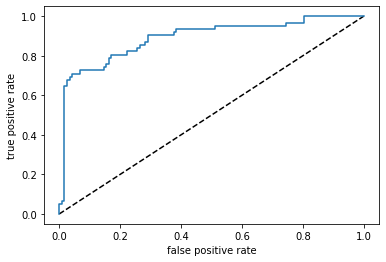

In [55]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='gaussianMB')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [56]:
auc_score=roc_auc_score(y_test,gnb.predict(x_test))
print(auc_score)

0.8059001929969672


In [57]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
y_pred_prob=dtn.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

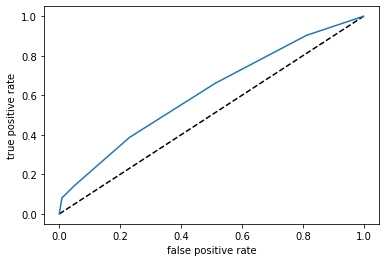

0.5781637717121588


In [58]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNN')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()
auc_score=roc_auc_score(y_test,dtn.predict(x_test))
print(auc_score)

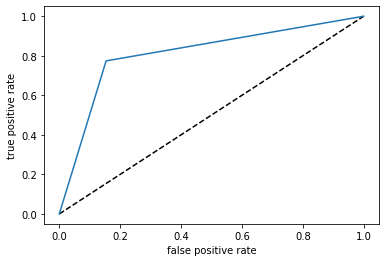

0.8101736972704715


In [59]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
y_pred_prob=dct.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='decisionTree')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()
auc_score=roc_auc_score(y_test,dct.predict(x_test))
print(auc_score)

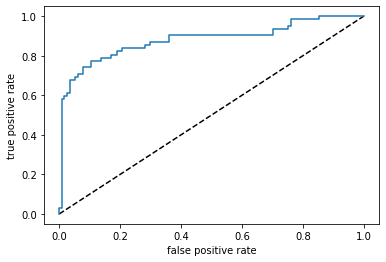

0.8272677143644885


In [60]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print(auc_score)

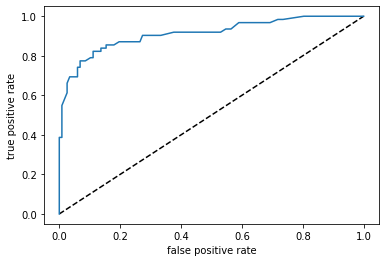

0.8514612627515854


In [61]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
print(auc_score)

In [62]:
from sklearn.model_selection import cross_val_score
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),GaussianNB(),LogisticRegression(),RandomForestClassifier()]
for m in model:
    score=cross_val_score(m,x,y,cv=8)
    print(score)
    print(score.mean())
    print(score.std())

[0.76785714 0.73214286 0.65178571 0.68468468 0.63063063 0.53153153
 0.75675676 0.67567568]
0.6788831241956242
0.07214247036982065
[0.61607143 0.625      0.66964286 0.66666667 0.64864865 0.63063063
 0.7027027  0.63963964]
0.6498753217503218
0.02669633349258016
[0.61607143 0.65178571 0.40178571 0.3963964  0.47747748 0.44144144
 0.54954955 0.66666667]
0.5251467985842986
0.10368319825140256
[0.76785714 0.76785714 0.79464286 0.8018018  0.78378378 0.79279279
 0.76576577 0.82882883]
0.7879162644787644
0.02014985222062659
[0.75       0.79464286 0.82142857 0.76576577 0.75675676 0.74774775
 0.81081081 0.78378378]
0.7788670366795367
0.026379830333558753
[0.79464286 0.79464286 0.79464286 0.90990991 0.84684685 0.83783784
 0.81081081 0.86486486]
0.8317748552123552
0.03879401887068048


In [ ]:
#as per my RandomForestClassifier has high roc_auc_curve and cross_val_score


In [63]:
from sklearn.externals import joblib
joblib.dump(rf,'rf.titanic.pkl')

['rf.titanic.pkl']